In [2]:
import pandas as pd
import numpy as np

In [3]:
import LabData
from LabData.DataLoaders.Loader import Loader

In [4]:
cgmLoader = Loader.get_loader("CGMLoader")

In [5]:
cgm = cgmLoader.get_data()

In [6]:
cgm_df = cgm.df

In [7]:
cgm_df.reset_index(inplace=True)

In [31]:
gdm_df = pd.read_csv('/home/elming/Downloads/GDM_michal.csv')

In [10]:
gdm_df

,clock,RegistrationCode,Name,Round,Due Date,profiling,T=0,2w,1m,2m,3m,labour date,6w al,3m al,6m al,12m al,Dropout reason
0,3/12/2017,859116.0,שי הובר,1.0,NaN,V,10/7/2017,V,V,NaN,NaN,29/8/2017,V,V,V,NaN,NaN
1,NaN,64229.0,נטע פורה,2.0,NaN,V,28/9/2017,V,V,NaN,NaN,10/11/2017,NaN,V,NaN,29.11,NaN
2,NaN,637617.0,שרית קול,2.0,NaN,V,28/9/2017,V,V,NaN,NaN,16/11/2017,NaN,V,NaN,NaN,NaN
3,NaN,757248.0,אטי תל כץ,2.0,NaN,V,28/9/2017,V,V,V,NaN,16/11/2017,NaN,V,V,3.10,NaN
4,NaN,670055.0,נעמה שחר,3.0,29/12/2017,V,18/10/2017,V,V,V,NaN,20/12/2017,NaN,V,V,NaN,NaN


In [9]:
gdm_df['RegistrationCode'] = gdm_df['RegistrationCode'].astype(str)

In [10]:
gdm_dict = gdm_df.set_index('RegistrationCode').to_dict()['alloc']

In [11]:
gdm_dict.keys()

dict_keys(['2972055', '859116', '64229', '637617', '757248', '670055', '162064', '675329', '813087', '260199', '292486', '999443', '986640', '517738', '521161', '262895', '30398', '394858', '485966', '471439', '909576', '405661', '531067', '511664'])

In [25]:
alloc1_rc_list = []
for rc in gdm_dict.keys():
    if gdm_dict[rc] == 1:
        alloc1_rc_list.append(rc)

In [26]:
alloc1_rc_list

['2972055',
 '859116',
 '64229',
 '637617',
 '757248',
 '292486',
 '999443',
 '986640',
 '394858',
 '909576',
 '511664']

In [12]:
cgm_filtered = cgm_df[cgm_df['RegistrationCode'].isin(gdm_dict.keys())]

In [13]:
cgm_filtered = cgm_filtered.set_index(['RegistrationCode', 'ConnectionID', 'Date'])

In [16]:
mage_df = cgmLoader.calculate_mage(cgm_filtered)

In [86]:
len(mage_df.date)

1632

In [29]:
mage_df['alloc'] = 0

In [30]:
mage_df.loc[mage_df['RegistrationCode'].isin(alloc1_rc_list), 'alloc'] = 1

In [31]:
mean_mage = mage_df.groupby(['RegistrationCode'], as_index=False)['mage','hmage','lmage'].agg('mean')

In [33]:
mean_mage['alloc'] = 0

In [34]:
mean_mage.loc[mean_mage['RegistrationCode'].isin(alloc1_rc_list), 'alloc'] = 1

In [35]:
mean_mage

,RegistrationCode,mage,hmage,lmage,alloc
0,162064,26.888333,23.583333,30.191667,0
1,260199,17.099231,16.550000,17.646923,0
2,262895,21.210909,11.379091,31.043636,0
3,292486,15.357308,11.615962,19.099231,1
4,2972055,25.645357,21.384643,29.905000,1
5,30398,13.404091,10.363182,16.444773,0
6,394858,16.268738,12.639709,19.897184,1
7,405661,16.512759,13.879655,19.145000,0
8,471439,15.981818,9.373068,22.591136,0
9,485966,17.236114,13.786493,20.685972,0


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

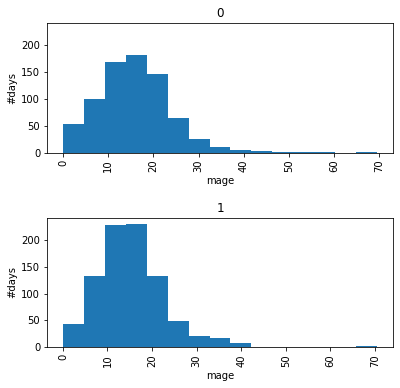

In [61]:
hist = mage_df.hist(column='mage', by = 'alloc', bins=15, sharey=True, layout = (2, 1), figsize=(6,6))

for ax in hist.flatten():
    ax.set_xlabel("mage")
    ax.set_ylabel("#days")


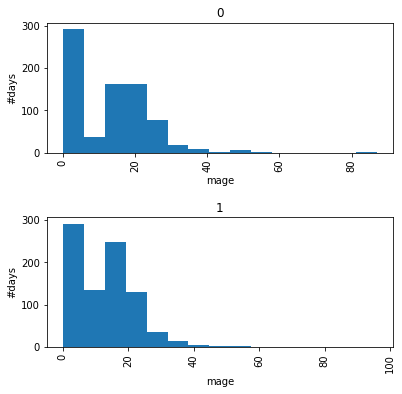

In [64]:
hist = mage_df.hist(column='hmage', by = 'alloc', bins=15, sharey=True, layout = (2, 1), figsize=(6,6))

for ax in hist.flatten():
    ax.set_xlabel("mage")
    ax.set_ylabel("#days")

Text(0, 0.5, 'mage')

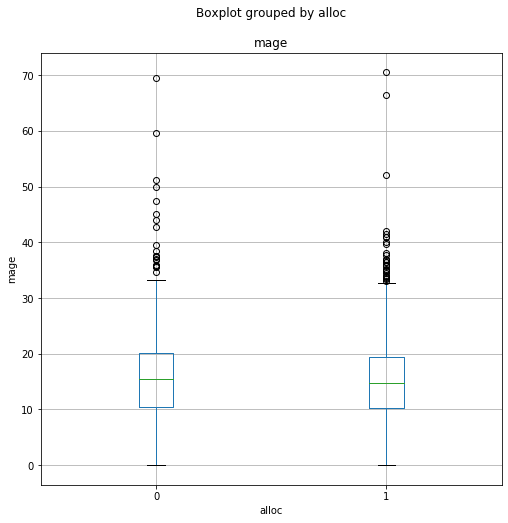

In [85]:
boxplot = mage_df.boxplot(column='mage', by='alloc', figsize=(8,8))
boxplot.set_ylabel('mage')

In [69]:
from scipy import stats

In [83]:
control = np.array(mage_df.loc[mage_df['alloc'] == 0]['mage'])
main = np.array(mage_df.loc[mage_df['alloc'] == 1]['mage'])

In [84]:
stats.ttest_ind(control, main)

Ttest_indResult(statistic=1.166132877018877, pvalue=0.24373132047888377)

## Heatmap on GDM mage for the time before labour date

In [38]:
gdm_df.dropna(subset=['labour date'], inplace=True)

In [39]:
gdm_df['labour date'] = pd.to_datetime(gdm_df['labour date'])

In [20]:
cgm_df

,RegistrationCode,ConnectionID,Date,GlucoseValue,PPGR
0,-1,1,2013-01-21 14:20:50+02:00,88.0,0.000000
1,-1,1,2013-01-21 14:25:50+02:00,89.0,0.000000
2,-1,1,2013-01-21 14:30:50+02:00,87.0,0.000000
3,-1,1,2013-01-21 14:35:50+02:00,85.0,0.000000
4,-1,1,2013-01-21 14:40:50+02:00,84.0,2.583333
...,...,...,...,...,...
7974197,9999,27,2013-02-09 19:37:29+02:00,75.0,NaN
7974198,9999,27,2013-02-09 19:42:29+02:00,77.0,NaN
7974199,9999,27,2013-02-09 19:47:29+02:00,80.0,NaN
7974200,9999,27,2013-02-09 19:52:29+02:00,84.0,NaN


In [40]:
gdm_df['RegistrationCode']

0     859116.0
1      64229.0
2     637617.0
3     757248.0
4     670055.0
6     675329.0
7     999443.0
8     292486.0
11    986640.0
12    517738.0
13    521161.0
15     30398.0
16    394858.0
17    485966.0
18    471439.0
19    909576.0
20    405661.0
21    531067.0
22         NaN
Name: RegistrationCode, dtype: float64

In [41]:
gdm_dict = gdm_df.set_index('RegistrationCode').to_dict()['labour date']

In [42]:
gdm_dict.keys()

dict_keys([859116.0, 64229.0, 637617.0, 757248.0, 670055.0, 675329.0, 999443.0, 292486.0, 986640.0, 517738.0, 521161.0, 30398.0, 394858.0, 485966.0, 471439.0, 909576.0, 405661.0, 531067.0, nan])

In [49]:
rc_list = ['859116', '64229', '637617', '757248', '670055', '675329', '999443', '292486', '986640', '517738', '521161', '30398', '394858', '485966', '471439', '909576', '405661', '531067', '511664']

In [50]:
gdm_df['RegistrationCode'] = rc_list

In [52]:
gdm_df['RegistrationCode']

0     859116
1      64229
2     637617
3     757248
4     670055
6     675329
7     999443
8     292486
11    986640
12    517738
13    521161
15     30398
16    394858
17    485966
18    471439
19    909576
20    405661
21    531067
22    511664
Name: RegistrationCode, dtype: object